# GOLD PRICE PREDICTION

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
# loading the csv data to a pandas Dataframe
gold=pd.read_csv('gld_price_data.csv')

In [13]:
# checking the first five rows in the Dataframe
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [16]:
# getting some basic information of data
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [17]:
# getting the statistical measures of the data
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [15]:
# checking the rows and columns
gold.shape

(2290, 6)

In [19]:
# checking the number of missing values
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [22]:
#correlation:
    #1. positive correlation
    #2. Negative correlation

In [25]:
correlation=gold.corr()

<AxesSubplot:>

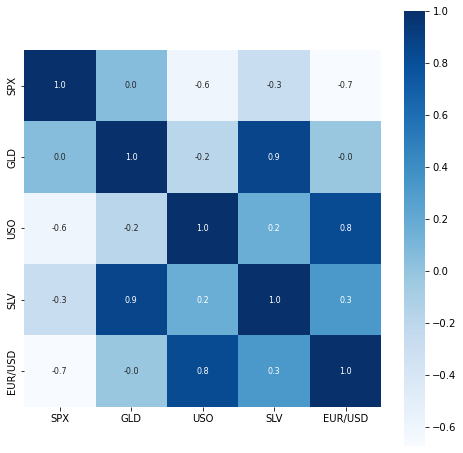

In [28]:
# constructing the heatmap to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True , fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [30]:
# correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [31]:
# correlation the distribution of the GLD price

C:\Users\H_7\.conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

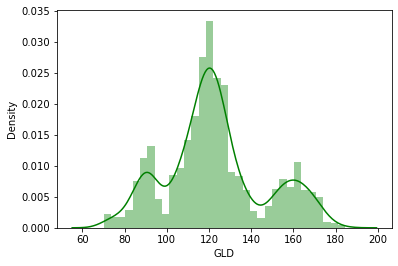

In [32]:
sns.distplot(gold['GLD'],color='green')

In [33]:
# splitting the features and target

In [38]:
x= gold.drop(['Date',"GLD"],axis=1)
y=gold['GLD']

In [39]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [40]:
# splitting into traing and testing data

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
regressor=RandomForestRegressor()

In [56]:
# training the model

regressor.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
# predicting on test data

In [58]:
test_data_prediction=regressor.predict(x_test)

In [59]:
print(test_data_prediction)

[168.52489944  82.01189969 116.02110009 127.60060047 120.64260141
 154.77329724 150.25389823 126.30930026 117.54529886 125.97760072
 116.44630119 171.45460054 141.60429889 167.81479853 115.28560007
 117.62640047 137.98270324 170.01220037 159.33550263 159.71579975
 155.20400034 125.1219004  176.03539955 157.05510287 125.12010052
  93.83269963  77.61879975 120.64760001 119.20670011 167.53389951
  88.41450064 125.22789973  91.09200091 117.68020041 121.27949881
 136.85940101 115.60090111 115.09530075 147.90599917 106.85020117
 104.45280255  87.15839798 126.52790035 117.90700024 154.44109893
 119.78350016 108.48109978 108.04899816  93.32540056 127.13659774
  74.72590051 113.76189966 121.29430002 111.17729918 118.87409899
 120.51179997 159.52640068 166.11410124 146.94059673  85.85619872
  94.17040045  86.78999854  90.48930008 119.0709007  126.42740071
 127.5412004  170.38280037 122.22749949 117.5531991   98.80760019
 168.95620148 143.02309822 131.73570309 121.32390241 120.98169924
 119.80240

In [60]:
from sklearn import metrics

In [61]:
#  R squared error

In [62]:
error_score = metrics.r2_score(y_test,test_data_prediction)

In [63]:
print("R squared error :", error_score)

R squared error : 0.989631328706461


In [64]:
# compare the actual values and predicted values

In [69]:
y_test = list(y_test)

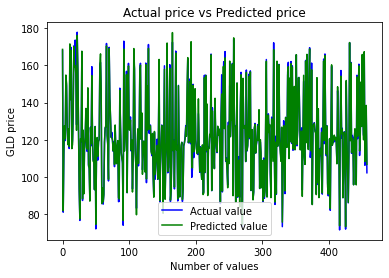

In [70]:
plt.plot(y_test,color='blue',label='Actual value')
plt.plot(test_data_prediction, color='green',label='Predicted value')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()